<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [110]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [111]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [112]:
len(X_train)

60000

In [113]:
len(X_test)

10000

In [114]:
X_train[0].shape

(28, 28)

In [115]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

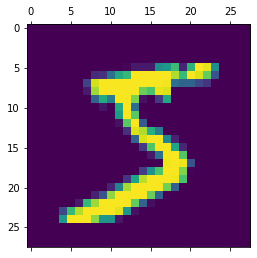

In [116]:
plt.matshow(X_train[0])

In [117]:
y_train[0]

5

In [118]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [119]:
X_train.shape

(60000, 28, 28)

In [120]:
X_train = X_train/255
X_test = X_test/255

In [121]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [122]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [123]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7095 - accuracy: 0.8190
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3134 - accuracy: 0.9131
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2794 - accuracy: 0.9222
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2762 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2648 - accuracy: 0.9250


In [124]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2740 - accuracy: 0.9216


[0.27401646971702576, 0.9215999841690063]

In [125]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.7626246e-02, 5.0968578e-07, 4.5950979e-02, 9.6764559e-01,
       3.4336150e-03, 1.0313499e-01, 1.4087753e-06, 9.9979973e-01,
       1.0463074e-01, 7.2992313e-01], dtype=float32)

In [130]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [133]:
cm  = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    3,    0,    4,    2,    3,    2,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [  10,   12,  900,   24,    8,    2,   11,   12,   50,    3],
       [   2,    0,   15,  935,    0,   12,    2,   11,   25,    8],
       [   2,    1,    4,    1,  919,    0,    7,    4,   10,   34],
       [   9,    3,    2,   55,   11,  735,   14,    8,   48,    7],
       [  13,    3,    8,    2,    9,   10,  906,    2,    5,    0],
       [   1,    5,   19,    5,    7,    0,    0,  951,    3,   37],
       [   6,    7,    6,   20,    9,   15,    8,   13,  883,    7],
       [  11,    7,    1,   10,   29,    4,    0,   27,    7,  913]])>

Text(69.0, 0.5, 'Truth')

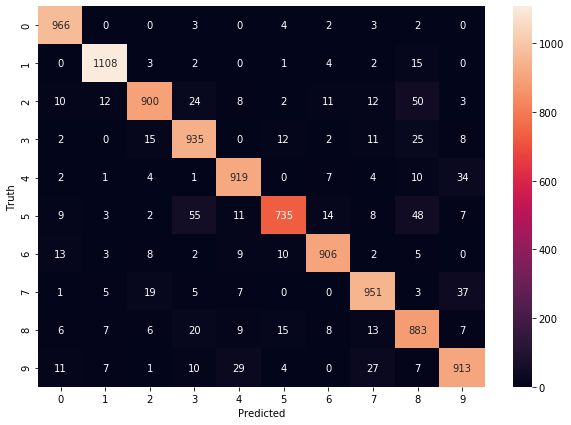

In [134]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [140]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),    
    keras.layers.Dense(10, activation='sigmoid')   
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4526 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1303 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0851 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0498 - accuracy: 0.9853


In [141]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0751 - accuracy: 0.9759


[0.0751459151506424, 0.9758999943733215]

Text(69.0, 0.5, 'Truth')

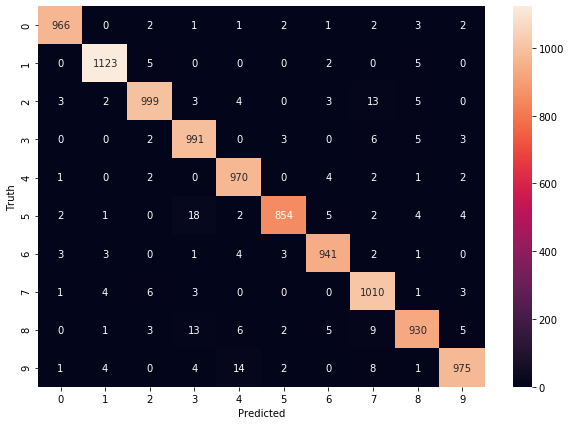

In [142]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [143]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(100, activation='relu'),    
    keras.layers.Dense(10, activation='sigmoid')   
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4551 - accuracy: 0.8712
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1251 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0830 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0617 - accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0468 - accuracy: 0.9857
